<a href="https://colab.research.google.com/github/tufte28/MAT-494/blob/main/MAT494_3_5%263_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.5: K-Means

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Create cluster plot

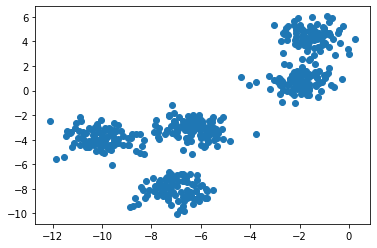

In [27]:
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.75, random_state=1)
plt.scatter(X[:,0], X[:,1])

Using elbow method which tests for optimal number of clusters

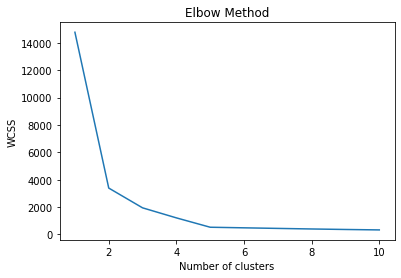

In [28]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Pinpointing the centers

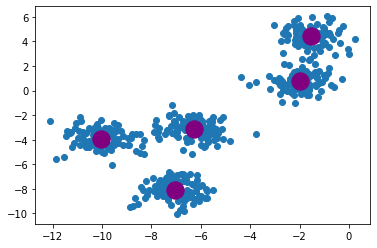

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=1)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='purple')
plt.show()

3.6: Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

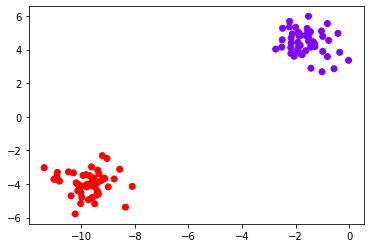

In [47]:
X, y = make_blobs(n_samples = 100, centers = 2,
                  random_state = 1, cluster_std = 0.75)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

# plot the data we just generated
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
svc = LinearSVC() 
svc.fit(X_train, y_train)

LinearSVC()

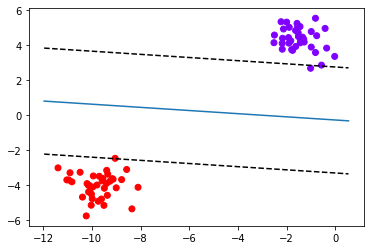

In [50]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')